In [1]:
import numpy as np # for large dataset 
import pandas as pd # There are many files containing a huge amount of data but for building a decent system.
import matplotlib.pyplot as plt #for visualization
import seaborn as sns ##for visualization

In [2]:
# loading csv files on to python platform
df_books = pd.read_csv('./book_dataset/transformed_dataset_copy/metadata_clean.csv')
df_ratings = pd.read_csv('./book_dataset/transformed_dataset_copy/ratings_clean.csv')
df_reviews = pd.read_csv('./book_dataset/transformed_dataset_copy/reviewss_clean.csv')
df_survey = pd.read_csv('./book_dataset/transformed_dataset_copy/survey_answers_clean.csv')
df_tagCount = pd.read_csv('./book_dataset/transformed_dataset_copy/tag_count_clean.csv')
df_tags = pd.read_csv('./book_dataset/transformed_dataset_copy/tags_clean.csv')

In [3]:
## joining the books vs user rating
df_exhortation = pd.merge(df_books, df_ratings, on='item_id', how='inner')

In [4]:
df_exhortation.head(), df_exhortation.shape

(    item_id                                                url  \
 0  16827462  https://www.goodreads.com/book/show/11870085-t...   
 1  16827462  https://www.goodreads.com/book/show/11870085-t...   
 2  16827462  https://www.goodreads.com/book/show/11870085-t...   
 3  16827462  https://www.goodreads.com/book/show/11870085-t...   
 4  16827462  https://www.goodreads.com/book/show/11870085-t...   
 
                     title     authors lang  \
 0  the fault in our stars  John Green  eng   
 1  the fault in our stars  John Green  eng   
 2  the fault in our stars  John Green  eng   
 3  the fault in our stars  John Green  eng   
 4  the fault in our stars  John Green  eng   
 
                                                  img  year  \
 0  https://images.gr-assets.com/books/1360206420m...  2012   
 1  https://images.gr-assets.com/books/1360206420m...  2012   
 2  https://images.gr-assets.com/books/1360206420m...  2012   
 3  https://images.gr-assets.com/books/1360206420m...  2012 

In [5]:
df_exhortation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5152656 entries, 0 to 5152655
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   item_id      int64 
 1   url          object
 2   title        object
 3   authors      object
 4   lang         object
 5   img          object
 6   year         int64 
 7   description  object
 8   user_id      int64 
 9   rating       int64 
dtypes: int64(4), object(6)
memory usage: 432.4+ MB


### eliminating noise 
1. Upon conducting some data analysis, we discover that the majority of books are either not evaluated at all or are rated 0.

In [6]:
#df_exhortation.groupby('rating').size()
zerorating = df_exhortation.groupby('rating').size()
zerorating

rating
1     156250
2     359785
3     974773
4    1726522
5    1935326
dtype: int64

In [8]:
## finding unique users
uniqueUsers = len(df_exhortation['user_id'].unique())
uniqueBooks = len(df_exhortation['item_id'].unique())
uniqueUsers, uniqueBooks
# How many books have ratings of 0 or not at all?
ratedUsers = uniqueUsers * uniqueBooks
nonratedUsers = ratedUsers -  len(df_exhortation.index)
df_rate_ = pd.DataFrame(df_exhortation.groupby('rating').size(), columns=['#no of people'])
start_row = pd.DataFrame({'count': nonratedUsers}, index=[0])
df_rate_, start_row
df_ratings_ = pd.concat([start_row, df_rate_]).reset_index(drop = True)
df_ratings_['score'] = df_ratings_.index
df_ratings_ = df_ratings_.drop('count', axis=1)
df_ratings_ = df_ratings_.drop(0)
df_ratings_

,#no of people,score
1,156250.0,1
2,359785.0,2
3,974773.0,3
4,1726522.0,4
5,1935326.0,5


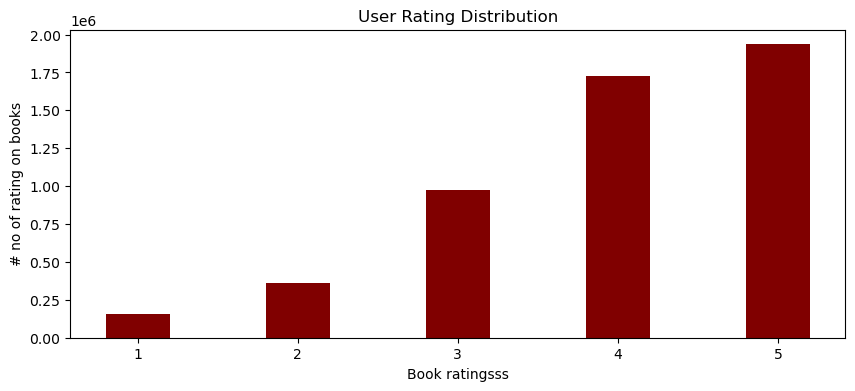

In [9]:
figure = plt.figure(figsize = (10, 4))
# ploating bar chart
plt.bar(df_ratings_['score'], df_ratings_['#no of people'], color ='maroon',
        width = 0.4)
plt.xlabel("Book ratingsss")
plt.ylabel("# no of rating on books")
plt.title('User Rating Distribution')
plt.show()

**In order to determine how much two users (user-based CF) or two things (item-based CF) are associated, one of the most widely used similarity metrics is Pearson Correlation.**


1. Applaying Pearsons Correlation

In [10]:
df_exhortation = df_exhortation[:3000000] # taking long time with overall data so slicing the data with 
df_book_re =  df_exhortation.pivot_table(index ='user_id', columns = 'title', values = 'rating')
df_book_re.fillna(0, inplace=True)
df_book_re.head()

In [68]:
# Look for books that are comparable to 'fangirl'
fangirl_user_ratings = df_book_re['fangirl']
relevent_fangirl = df_book_re.corrwith(fangirl_user_ratings)
pearson_fangirl = pd.DataFrame(relevent_fangirl, columns = ['Correlation']).dropna()
pearson_fangirl.sort_values(by='Correlation', ascending=False)

,Correlation
title,
fangirl,1.000000
eleanor park,0.296900
attachments,0.247545
landline,0.239332
carry on,0.231721
...,...
guns germs and steel the fates of human societies,-0.003545
the prophet,-0.003888
rich dad poor dad,-0.004410


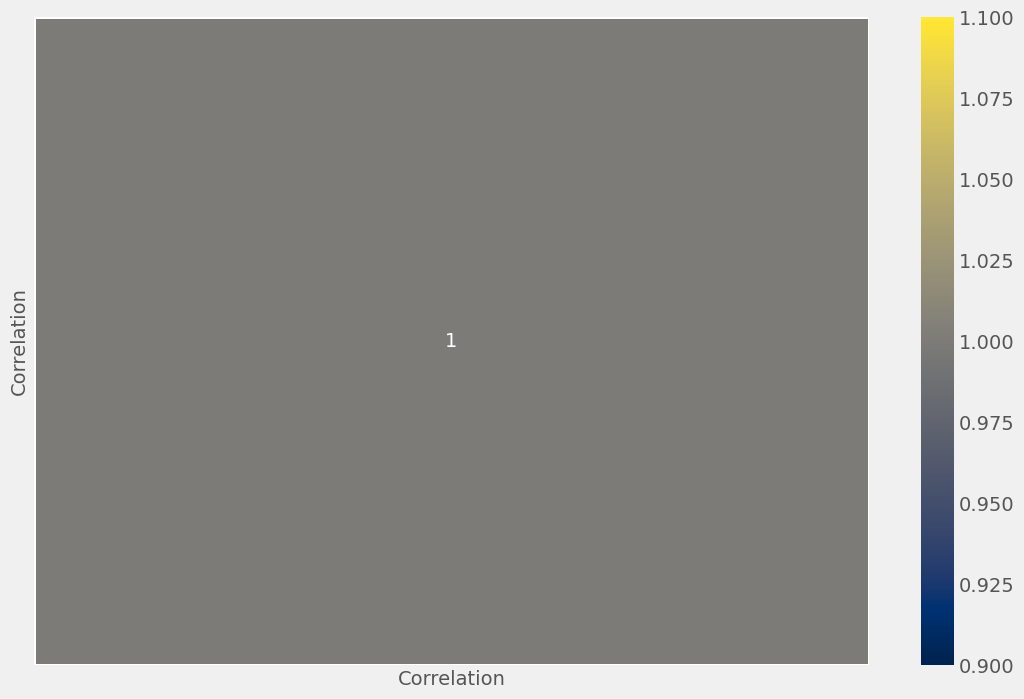

In [69]:
peaMatrix = pearson_fangirl.corr()
round(peaMatrix,1)
plt.figure(figsize=(12, 8))
sns.heatmap(peaMatrix, cmap='cividis', annot=True, linewidths=2)
plt.show()

/var/folders/nj/5n17tpm16j1dszf8dzt_qfj00000gn/T/ipykernel_4330/3963359109.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormatrix = df_exhortation.corr()


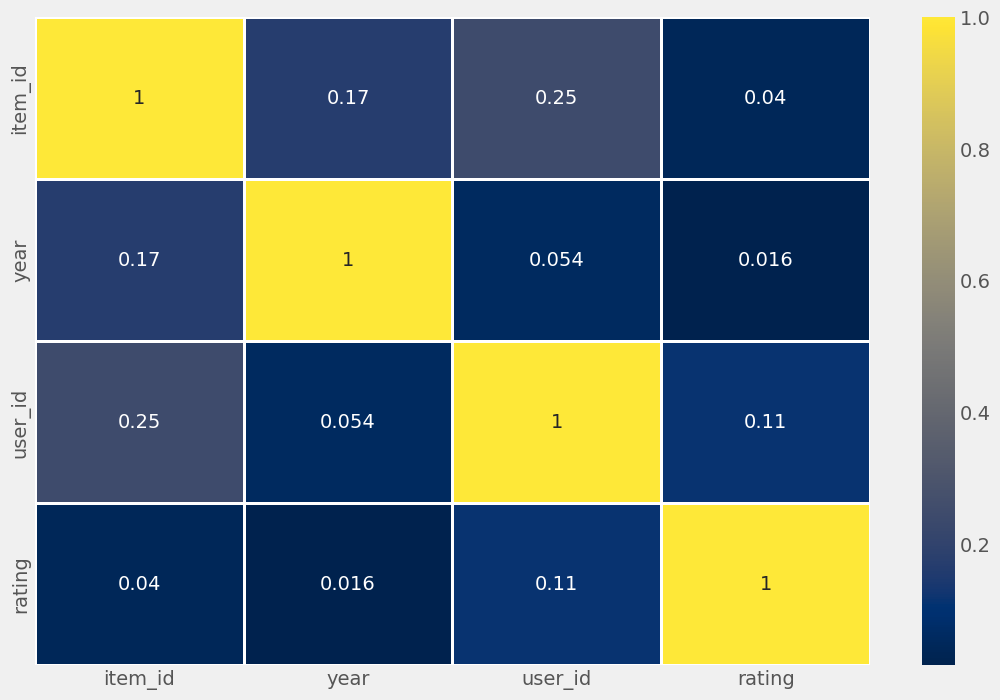

In [62]:
peaMatrix = df_exhortation.corr()
round(peaMatrix,2)
plt.figure(figsize=(12, 8))
sns.heatmap(peaMatrix, cmap='cividis', annot=True, linewidths=2)
plt.show()

In [11]:
df_exhortation['title'].unique()

array(['the fault in our stars', 'the hunger games the hunger games 1',
       'mockingjay the hunger games 3', ..., 'the baller',
       'crash crash 1', 'all the pretty horses the border trilogy 1'],
      dtype=object)

#### Visualizing the data for variation 

It displays the variance in the distribution of the data related to various characteristics.

In [12]:
avg_rating = df_exhortation.groupby(['item_id']).mean()
avg_rating

/var/folders/nj/5n17tpm16j1dszf8dzt_qfj00000gn/T/ipykernel_4330/2162854319.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_rating = df_exhortation.groupby(['item_id']).mean()


,year,user_id,rating
item_id,,,
115,2000.0,56654.938540,4.373880
423,2003.0,73145.704718,3.916286
817,2006.0,67820.028750,3.853117
2001,2001.0,66347.946860,4.277174
2384,2002.0,111276.648508,3.901427
...,...,...,...
51531861,2016.0,98561.016818,4.076326
51681900,2017.0,152152.262500,4.470833
51814255,2016.0,115874.056693,3.365354


In [13]:
avg_rating = df_exhortation.groupby(['item_id']).count()['rating']
avg_rating

item_id
115          781
423          657
817         3513
2001        1656
2384         771
            ... 
51531861     773
51681900     720
51814255     635
52586056     859
53837721    1433
Name: rating, Length: 1830, dtype: int64

### Score Evalution

In [14]:
## joining the books vs user rating
df_exhortation = pd.merge(df_books, df_survey, on='item_id', how='inner')
df_exhortation_score =  pd.merge(df_exhortation, df_ratings, on='item_id', how='inner')

In [15]:
df_exhortation_score =  df_exhortation_score[:3000000]

/var/folders/nj/5n17tpm16j1dszf8dzt_qfj00000gn/T/ipykernel_4330/3304165385.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_exhortation_score['score'], ax=axes[0], color='blue')


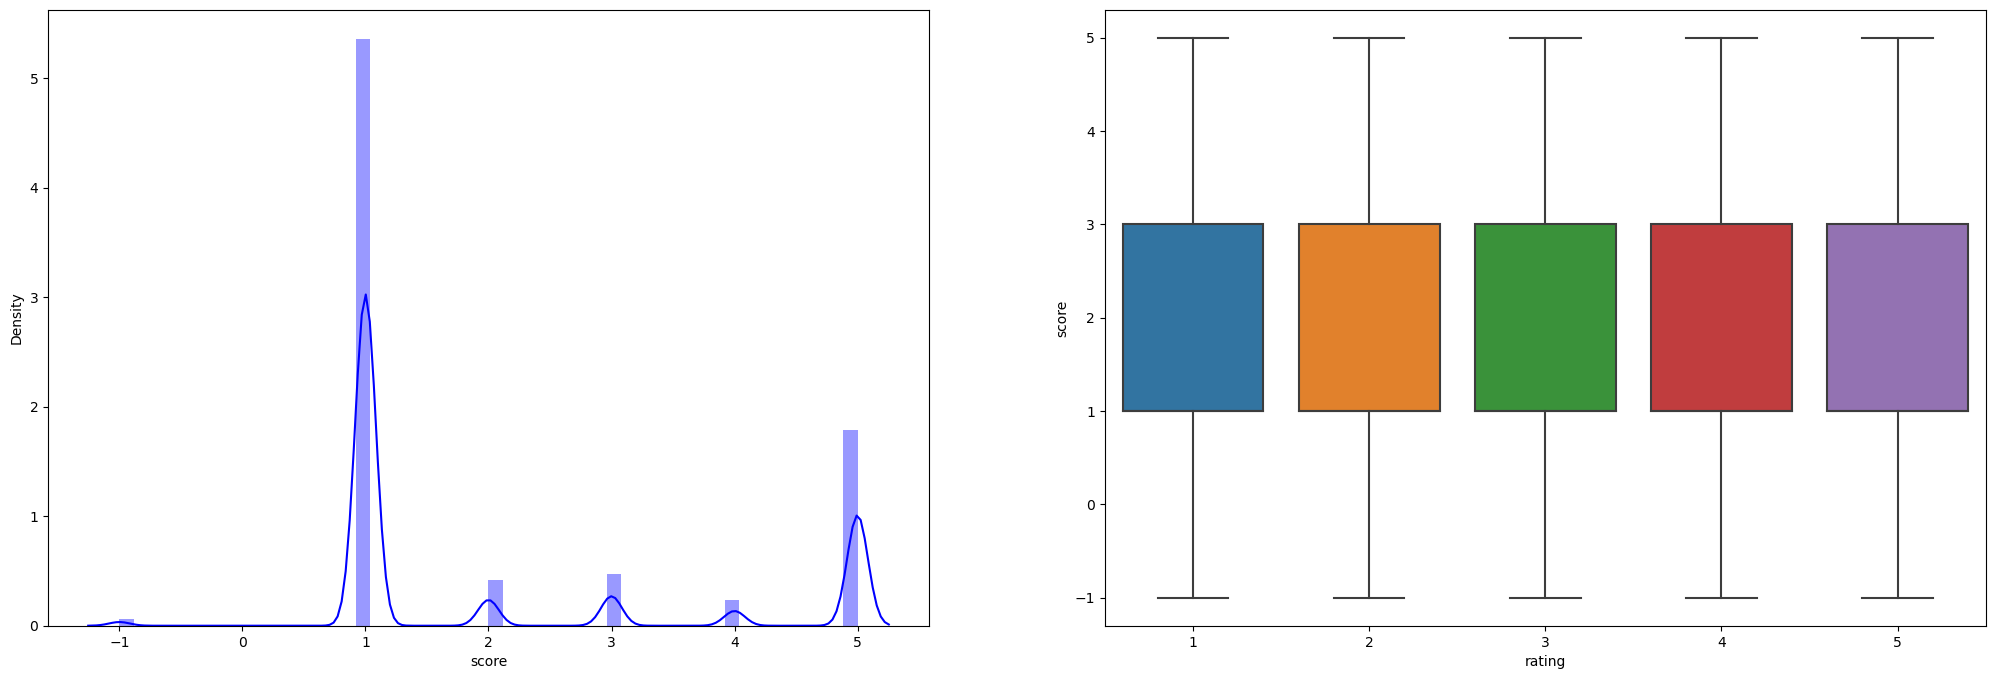

In [16]:
# ploatting the visuals 
figure, axes = plt.subplots(1, 2, figsize=(25,8))
sns.distplot(df_exhortation_score['score'], ax=axes[0], color='blue')
sns.boxplot(y= 'score', data=df_exhortation_score, ax=axes[1],  x='rating')
plt.show()

#### book_average_rating

In [18]:
## loading the csv files
df_books = pd.read_csv('./book_dataset/transformed_dataset_copy/metadata_clean.csv')
df_ratings = pd.read_csv('./book_dataset/transformed_dataset_copy/ratings_clean.csv')
## joining the books vs user rating
df_exhortation = pd.merge(df_books, df_ratings, on='item_id', how='inner')

In [4]:
avg_book_rate = df_exhortation.groupby(['item_id', 'year']).agg({'rating': ['count','mean']})

In [5]:
avg_book_rate.columns =['count_books','avg_book_rate']
avg_book_rate = avg_book_rate.reset_index()

In [6]:
avg_book_rate

,item_id,year,count_books,avg_book_rate
0,115,2000,781,4.373880
1,387,2005,179,3.335196
2,423,2003,657,3.916286
3,434,2006,326,3.503067
4,466,1997,233,4.120172
...,...,...,...,...
9369,56707521,2017,181,3.723757
9370,56872973,2017,170,4.423529
9371,56992688,2015,315,4.234921
9372,57041703,2017,230,4.130435


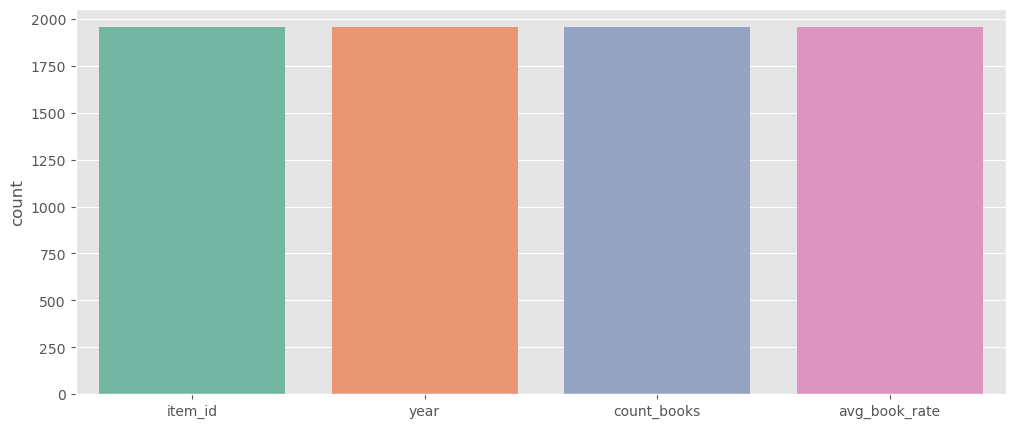

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
sns.countplot(data=avg_book_rate[(avg_book_rate['year'] >=2000) & (avg_book_rate['count_books'] >=500 )], palette='Set2')
plt.show()

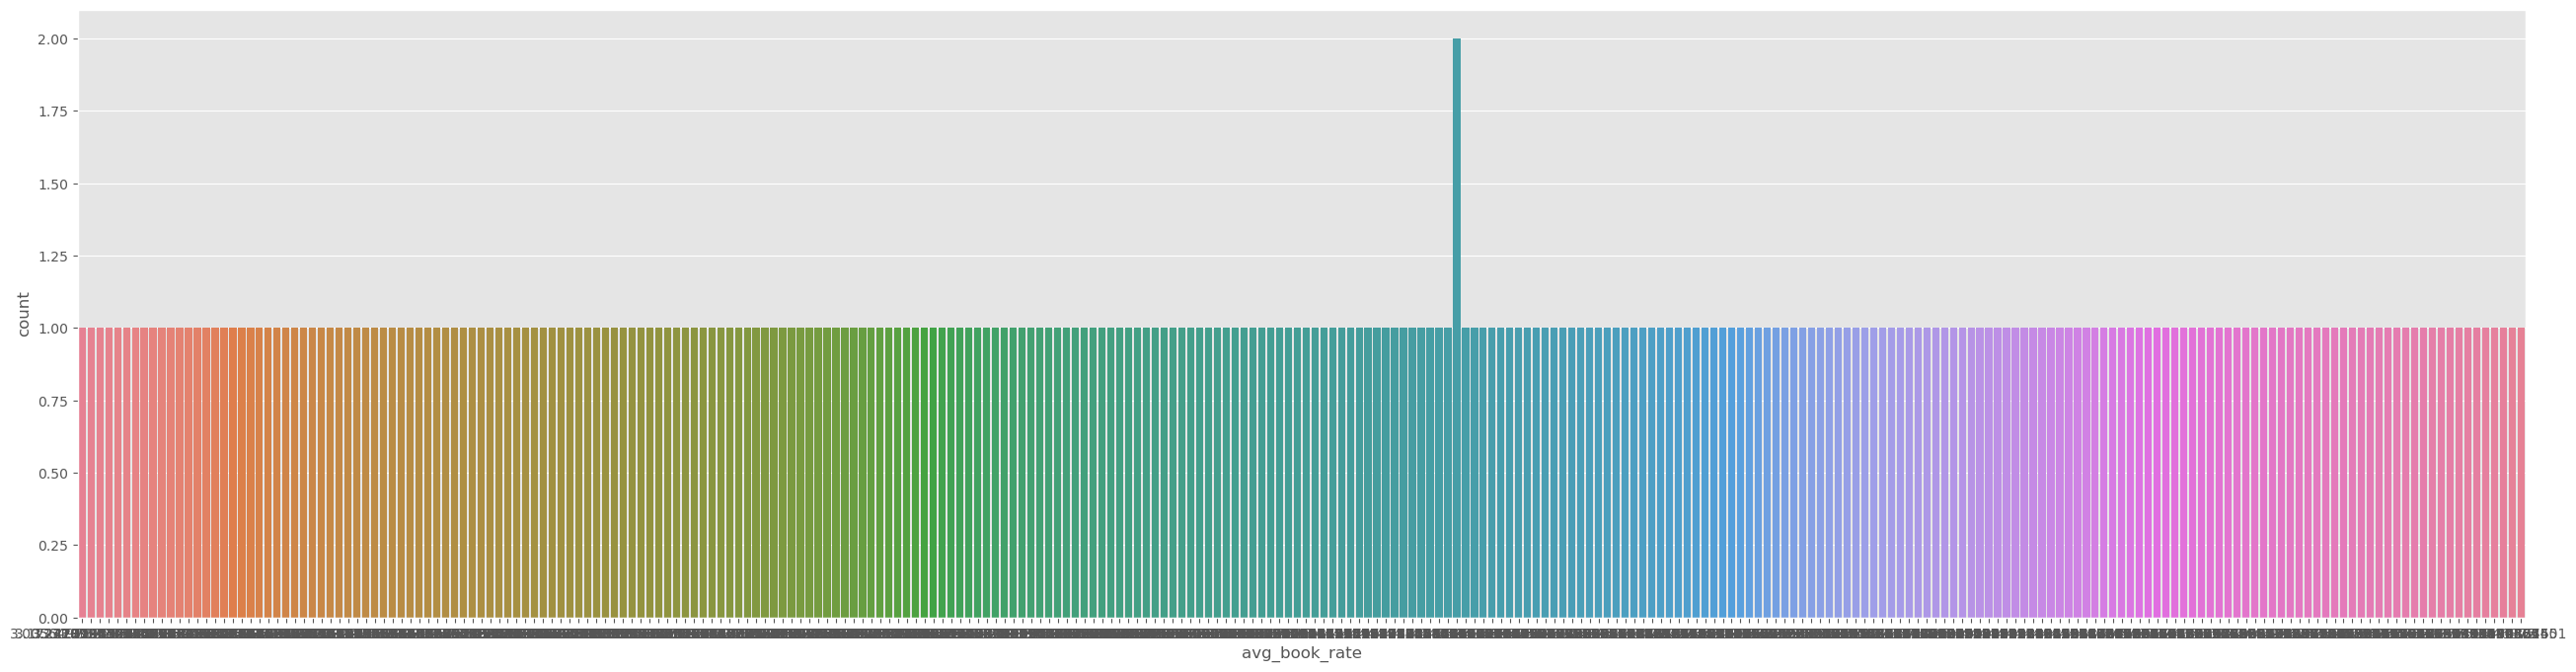

In [56]:
plt.style.use('ggplot')
plt.figure(figsize=(32, 8))
sns.countplot(data=avg_book_rate[avg_book_rate['year'] == 2017] , x='avg_book_rate', palette='husl')
plt.show()

In [70]:
df_exhortation

,item_id,url,title,authors,lang,img,year,description,user_id,rating
0,16827462,https://www.goodreads.com/book/show/11870085-t...,the fault in our stars,John Green,eng,https://images.gr-assets.com/books/1360206420m...,2012,"There is an alternate cover edition .\n""I fel...",150222,5
1,16827462,https://www.goodreads.com/book/show/11870085-t...,the fault in our stars,John Green,eng,https://images.gr-assets.com/books/1360206420m...,2012,"There is an alternate cover edition .\n""I fel...",100165,5
2,16827462,https://www.goodreads.com/book/show/11870085-t...,the fault in our stars,John Green,eng,https://images.gr-assets.com/books/1360206420m...,2012,"There is an alternate cover edition .\n""I fel...",232359,4
3,16827462,https://www.goodreads.com/book/show/11870085-t...,the fault in our stars,John Green,eng,https://images.gr-assets.com/books/1360206420m...,2012,"There is an alternate cover edition .\n""I fel...",246427,5
4,16827462,https://www.goodreads.com/book/show/11870085-t...,the fault in our stars,John Green,eng,https://images.gr-assets.com/books/1360206420m...,2012,"There is an alternate cover edition .\n""I fel...",75210,4
...,...,...,...,...,...,...,...,...,...,...
5152651,963076,https://www.goodreads.com/book/show/218659.Eve...,everything that rises must converge stories,Flannery O'Connor,eng,https://images.gr-assets.com/books/1412859621m...,1996,Librarian's Note: For an alternate hardcover e...,98489,4
5152652,963076,https://www.goodreads.com/book/show/218659.Eve...,everything that rises must converge stories,Flannery O'Connor,eng,https://images.gr-assets.com/books/1412859621m...,1996,Librarian's Note: For an alternate hardcover e...,70909,5
5152653,963076,https://www.goodreads.com/book/show/218659.Eve...,everything that rises must converge stories,Flannery O'Connor,eng,https://images.gr-assets.com/books/1412859621m...,1996,Librarian's Note: For an alternate hardcover e...,92854,5
5152654,963076,https://www.goodreads.com/book/show/218659.Eve...,everything that rises must converge stories,Flannery O'Connor,eng,https://images.gr-assets.com/books/1412859621m...,1996,Librarian's Note: For an alternate hardcover e...,213010,3


In [71]:
df_exhortation.to_csv('./book_dataset/transformed_dataset_copy/booksUserRatings.csv', encoding='utf-8', index=False)